In [1]:
import numpy as np

class Node:
     
        def _init_(self, parent = None, position = None):
            self.position = position
            self.parent = parent
            
            self.g = 0
            self.h = 0
            self.f = 0
            
        def _eq_(self, other):
            return self.position ==other.position
        

In [11]:
def return_path(current_node, maze):
    path =[]
    no_rows, no_columns = np.shape(maze)
    
    result = [[-1 for i in range(no_columns)] for j in range(no_rows)]
    current = current_node
    while current is not None:
        path.append(current.position)
        current = current.parent
    path = path[::-1]
    start_value = 0
    
    for i in range(len(path)):
        result[path[i][0]][path[i][1]] = start_value
        start_calue +=1
    return result

def search(maze, cost, start, end):
    
    start_node = Node(None, tuple(start))
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, tuple(end))
    end_node.g = end_node.h = end_node.f = 0
    
    yet_to_vist_list = []
    cisited_list = []
    yet_to_visit_list.append(start_node)
    
    outer_iterations = 0
    max_iterations = (len(maze)/2)**10
    
    move = [[1,0],
            [0,1],
            [-1,0],
            [0,-1]]
    
    no_rows, no_columns = np.shape(maze)
    
    while len(yet_to_visit_list) > 0:
        
        outer_iterations += 1
        
        current_node = yet_to_visit_list[0]
        current_index = 0
        for index, item in enumerate(yet_to_visit_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
                
        if outer_iterations > max_iterations:
            print("giving up on pathfinding too many iterations")
            return return_path(current_node, maze)
        
        yet_to_visit_list.pop(current_index)
        visited_list.append(current_node)
        
        if current_node == end_node:
            return return_node(current_node, maze)
        
    children = []

    for new_position in move:
    
        node_position = (current_node.position[0]+new_position[0],
                    current_node.position[1] + new_position[1])
    
        if(node_position[0] > (no_rows - 1) or
          node_position[0] < 0 or
          node_position[1] > (no_columns-1) or
          node_position[1] < 0):
            continue
        
        if maze[node_position[0]][node_position[1]] != 0:
            continue
         
        new_node = Node(current_node, node_position)
    
        children.append(new_Node)
    
        for child in children:
        
            if len([visited_child or visited_child in visited_list in visited_child ==child]) > 0:
                continue
            
            child.g = current_node.g+cost
            child.h = (((child.position[0] - end_node.position[0])**2)+
                    ((child.position[1] - end_node.position[1])**2))
            
            child.f = child.g+child.h
        
            if len([i for i in yet_to_visit_list if child == i and child.g > i.g])>0:
                continue
            
            yet_to_visit_list.append(child)
        
            

In [12]:
def grid_making(grid):
    fig, ax = plt.subplots(figsize = (10,10))
    color = col.ListedColormap(['0.5','white'])

    ax.imshow(grid, cmap = color, origin = 'lower')
    major_ticks = np.arange(0,11,1)

    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)

    ax.grid(which = 'major', axis = 'both')


Grid of empty locations and obstacles: 
 [[ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0. -1.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.  0. -1.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1. -1. -1.  0.  0.  0.]]


NameError: name 'nx' is not defined

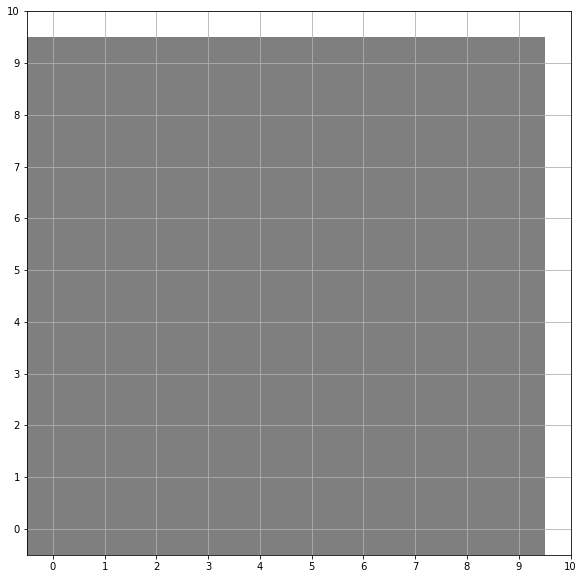

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as col
import numpy as np

obs_arr = [(4, 1),
          (3, 2),
          (5, 2),
          (6, 5.),
          (7., 5.),
          (8, 5.),
          (2., 8.),
          (1., 8.),
          (0., 8.),
          (9.,6.),
          (9.,5.),
          (9.,4.),
          (2., 2.),
          (6., 7.),
          (7., 8.),
          (2., 4.),
          (1., 6.),
          (5., 3.),]
grid = np.zeros((10,10))
grid_making(grid)

for x in range(len(obs_arr)):
    for i in range(10):
        for j in range(10):
            if obs_arr[x] == (i,j):
                grid[i][j] = -1
            else:
                continue
                
print("Grid of empty locations and obstacles: \n",grid)         

G = nx.grid_2d_graph(10,10)

print("number of nodes in total: \n", len(G.nodes))


for i in range(10):
    for j in range(10):
        if grid[i][j] == -1:
            G.remove_node((i,j))
    
print("number of nodes w/o obstacles: \n",len(G.nodes()))
print(G.nodes())

robo_pos = (9,9)
goal = (1,0)
cost = 1;

path = search(grid, cost, robo_pos, goal)
print(path)